# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# Importing Data

In [3]:
# Assign the path variable 

path = r'C:\Users\guest23455\Desktop\CareerFoundry\Data Immersion\Achievement 6_Advanced Analytics and Dashboard Design\06-2023 Apartment Rental in Germany Analysis'

In [4]:
# Import the cleaned immo data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned2_immodata.csv'), index_col = False)

In [5]:
df.shape

(7814, 25)

In [6]:
df.head()

,Unnamed: 0,State,Service_Charge,Newly_Constructed,Balcony,Picture_Count,Price_Trend,Total_Rent,Year_Constructed,Number of Parking Spaces,...,Pets_Allowed,Lift,Zipcode,Number of Rooms,Floor,Number of Floors,Has_Garden,City,Districts,Heating_Costs
0,0,Nordrhein-Westfalen,215.0,True,True,12,3.76,1320.65,2018,1.0,...,negotiable,True,44229,3.0,0.0,4.0,False,Dortmund,Kirchhörde,43.05
1,1,Niedersachsen,290.0,False,True,35,2.35,1878.48,2013,1.0,...,negotiable,True,37073,5.0,1.0,4.0,False,Göttingen_Kreis,Göttingen,160.00
2,2,Schleswig-Holstein,140.0,False,True,15,5.00,1450.00,1978,2.0,...,negotiable,False,24539,4.0,0.0,2.0,True,Neumünster,Wittorf,160.00
3,3,Hessen,155.0,False,True,16,3.46,635.00,1967,1.0,...,negotiable,True,34125,1.0,10.0,10.0,False,Kassel,Wesertor,72.00
4,4,Hessen,137.0,False,False,11,3.16,467.00,1967,1.0,...,negotiable,True,34117,1.0,1.0,10.0,False,Kassel,Wesertor,60.00


# Data Cleaning

##### Dropping columns

In [7]:
del df['Unnamed: 0']

In [8]:
df.head()

,State,Service_Charge,Newly_Constructed,Balcony,Picture_Count,Price_Trend,Total_Rent,Year_Constructed,Number of Parking Spaces,Has_Kitchen,...,Pets_Allowed,Lift,Zipcode,Number of Rooms,Floor,Number of Floors,Has_Garden,City,Districts,Heating_Costs
0,Nordrhein-Westfalen,215.0,True,True,12,3.76,1320.65,2018,1.0,False,...,negotiable,True,44229,3.0,0.0,4.0,False,Dortmund,Kirchhörde,43.05
1,Niedersachsen,290.0,False,True,35,2.35,1878.48,2013,1.0,False,...,negotiable,True,37073,5.0,1.0,4.0,False,Göttingen_Kreis,Göttingen,160.00
2,Schleswig-Holstein,140.0,False,True,15,5.00,1450.00,1978,2.0,False,...,negotiable,False,24539,4.0,0.0,2.0,True,Neumünster,Wittorf,160.00
3,Hessen,155.0,False,True,16,3.46,635.00,1967,1.0,False,...,negotiable,True,34125,1.0,10.0,10.0,False,Kassel,Wesertor,72.00
4,Hessen,137.0,False,False,11,3.16,467.00,1967,1.0,False,...,negotiable,True,34117,1.0,1.0,10.0,False,Kassel,Wesertor,60.00


##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

State                       0
Service_Charge              0
Newly_Constructed           0
Balcony                     0
Picture_Count               0
Price_Trend                 0
Total_Rent                  0
Year_Constructed            0
Number of Parking Spaces    0
Has_Kitchen                 0
geo_bln                     0
Cellar                      0
Base_Rent                   0
Area (m2)                   0
Pets_Allowed                0
Lift                        0
Zipcode                     0
Number of Rooms             0
Floor                       0
Number of Floors            0
Has_Garden                  0
City                        0
Districts                   0
Heating_Costs               0
dtype: int64

##### Duplicates check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(7814,)

##### Extreme values check

C:\Users\guest23455\AppData\Local\Temp\ipykernel_15468\3059112943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Rent'], bins=25) # Shows no extreme values


<Axes: xlabel='Total_Rent', ylabel='Density'>

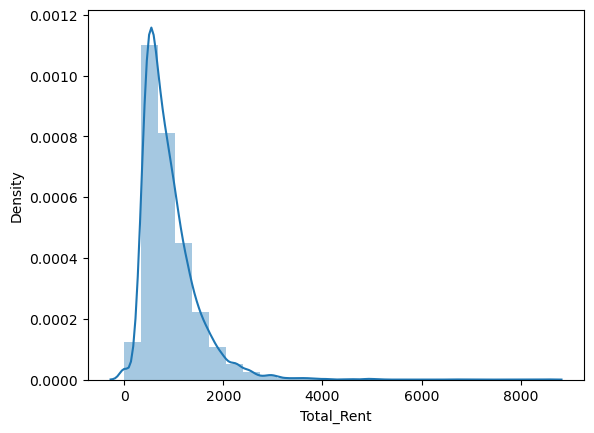

In [12]:
sns.distplot(df['Total_Rent'], bins=25) # Shows no extreme values

In [13]:
df['Total_Rent'].mean() # Check the mean

905.6644765804966

In [14]:
df['Total_Rent'].median() # Check the median

770.0

In [15]:
df['Total_Rent'].max() # Check the max

8550.0

# Data prep for Regression Analysis

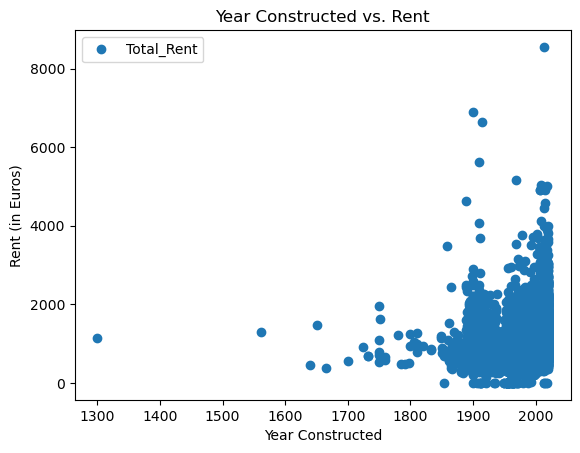

In [16]:
# Create a scatterplot 

df.plot(x = 'Year_Constructed', y='Total_Rent',style='o') 
plt.title('Year Constructed vs. Rent')  
plt.xlabel('Year Constructed')  
plt.ylabel('Rent (in Euros)')  
plt.show()

**Hypothesis : If the apartment is newly constructed then the rent is high.** 

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year_Constructed'].values.reshape(-1,1)
y = df['Total_Rent'].values.reshape(-1,1)

In [18]:
X

array([[2018],
       [2013],
       [1978],
       ...,
       [2019],
       [1964],
       [2016]], dtype=int64)

In [19]:
y

array([[1320.65],
       [1878.48],
       [1450.  ],
       ...,
       [ 830.  ],
       [ 805.  ],
       [1479.64]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

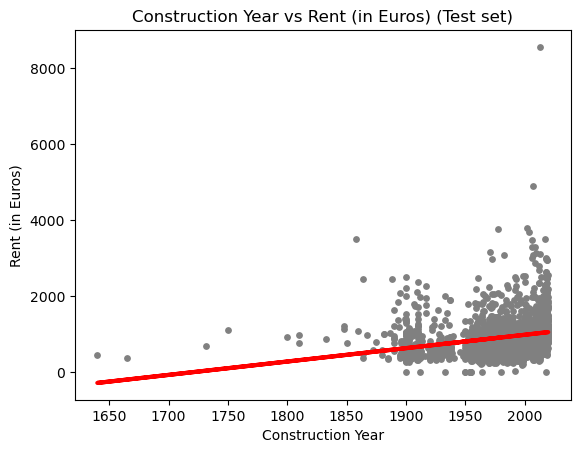

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Construction Year vs Rent (in Euros) (Test set)')
plot_test.xlabel('Construction Year')
plot_test.ylabel('Rent (in Euros)')
plot_test.show()

The trend does not not fit all the data points well, espcially when the rents are high. 

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.51486578]]
Mean squared error:  266936.7453116788
R2 score:  0.07112430148389304


In [27]:
y_predicted

array([[ 905.8264209 ],
       [ 888.25209201],
       [ 881.22236045],
       ...,
       [ 965.57913915],
       [1042.90618629],
       [ 744.14259507]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1345.00,905.826421
1,680.00,888.252092
2,1700.00,881.222360
3,914.00,1032.361589
4,970.00,828.499374
5,1198.79,937.460213
6,658.76,955.034542
7,800.00,867.162897
8,711.00,663.300682
9,730.00,955.034542


## Compare how the regression fits the trainning set

In [29]:
# Predict

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.51486578]]
Mean squared error:  285425.18085426884
R2 score:  0.06218892003502241


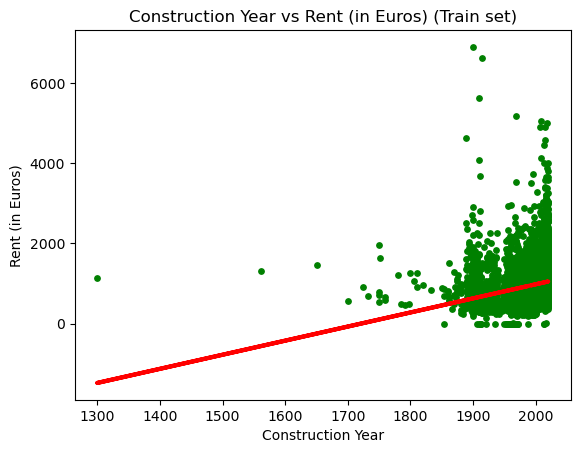

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Construction Year vs Rent (in Euros) (Train set)')
plot_test.xlabel('Construction Year')
plot_test.ylabel('Rent (in Euros)')
plot_test.show()

The difference between the MSE obtained during the model training and testing is high, which implies that over-fitting has occured. This model is not a good fit. 